In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore or disabled warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/LoanApprovalPrediction.csv


# Read datasets

In [2]:
df=pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/LoanApprovalPrediction.csv')
print('length of Train',len(df))

length of Train 614


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

 # Explore the dataset
**What is EDA on dataset?**
* Exploratory Data Analysis (EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# checking for unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
# checking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**visualize and analyze the columns**

**Note:** because the Data type of Loan_Status is object so I will replace Loan_Status (Y/N) into (0,1)
to show that  independent column is effect on dependent column or not.

this steps should to be in preprocessing steps but it is special case.

In [8]:
#replace male & female into 1 & 0
df['Loan_Status'].replace(to_replace=['Y', 'N'],
           value=[1,0],inplace = True)

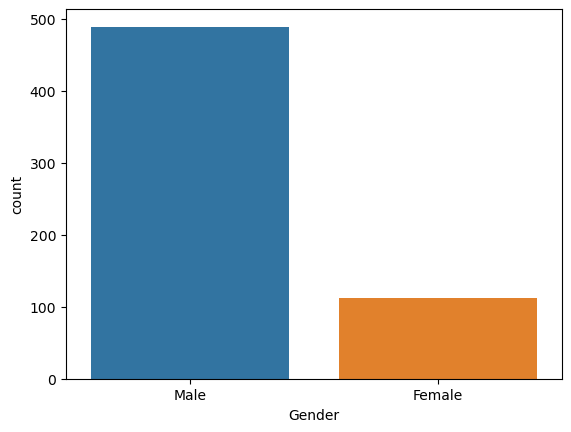

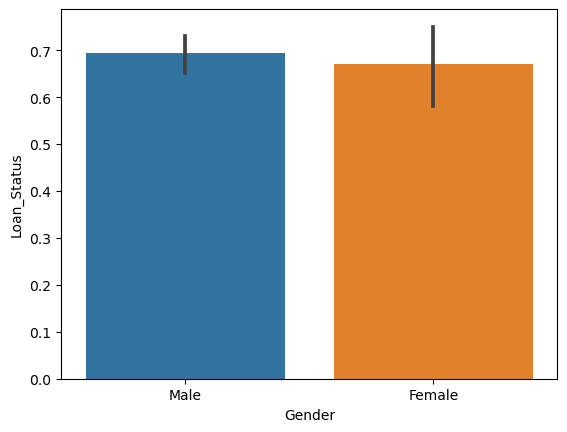

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
#independent column Gender
#Male/ Female
sns.countplot(data=df,x='Gender')
plt.show()

# to show that Gender column is effect on Loan_Status or not 
sns.barplot(data=df,x='Gender',y='Loan_Status')
plt.show()
df['Gender'].value_counts()

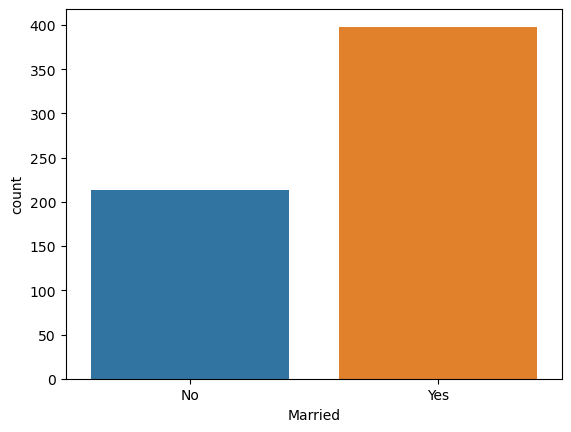

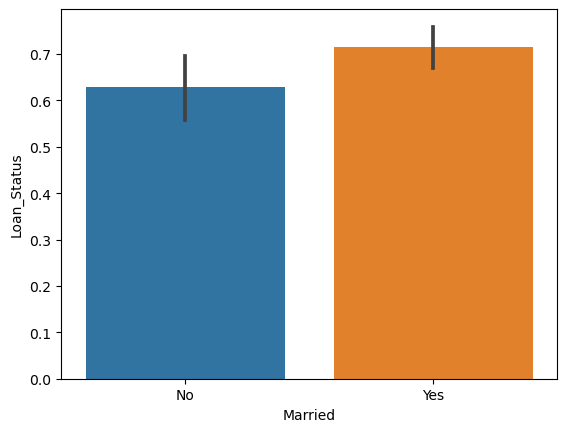

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
#independent column Married
#Applicant married (Y/N)
sns.countplot(data=df,x='Married')
plt.show()

# to show that Married column is effect on Loan_Status or not 
sns.barplot(data=df,x='Married',y='Loan_Status')
plt.show()
df['Married'].value_counts()

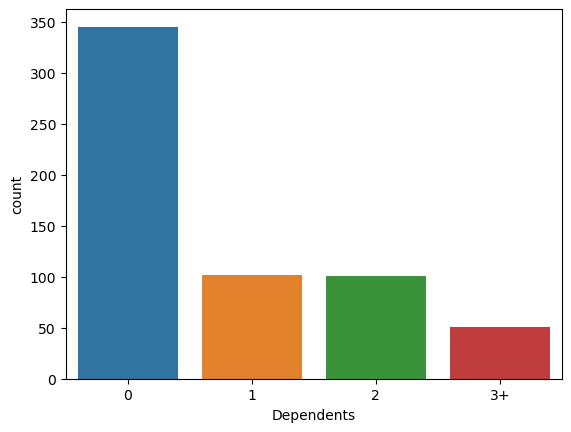

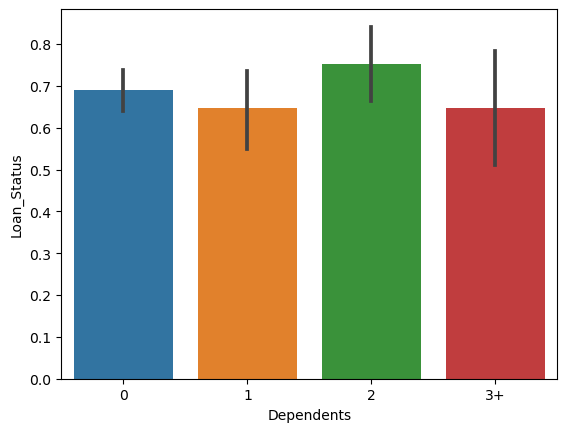

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
#independent column Dependents
#Number of dependents
sns.countplot(data=df,x='Dependents')
plt.show()

# to show that dependents column is effect on Loan_Status or not 
sns.barplot(data=df,x='Dependents',y='Loan_Status')
plt.show()
df['Dependents'].value_counts()

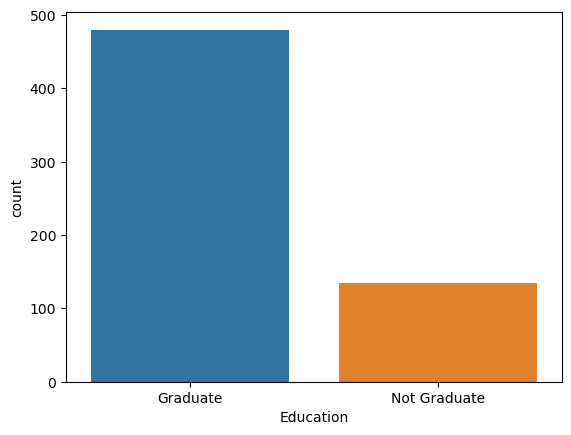

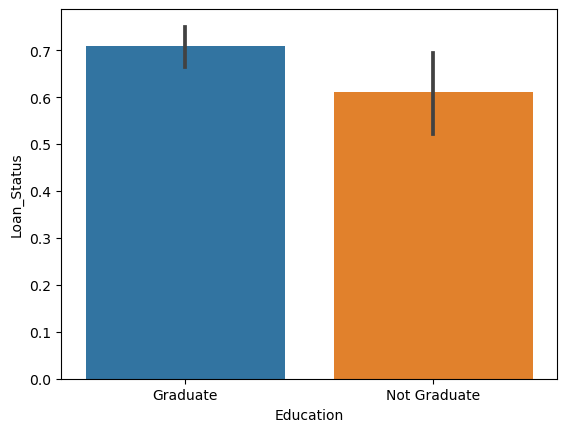

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
#independent column Education
#Applicant Education (Graduate/ Under Graduate)
sns.countplot(data=df,x='Education')
plt.show()

# to show that Education column is effect on Loan_Status or not 
sns.barplot(data=df,x='Education',y='Loan_Status')
plt.show()
df['Education'].value_counts()

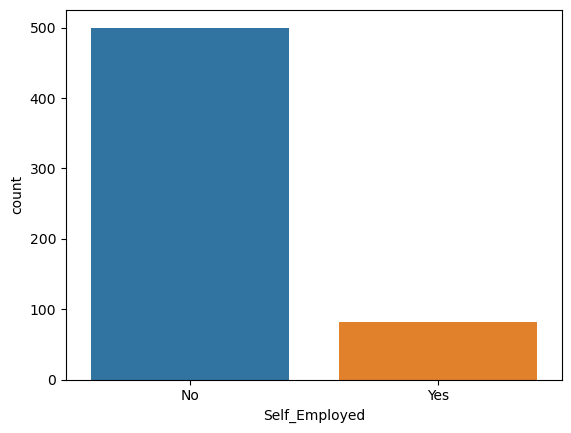

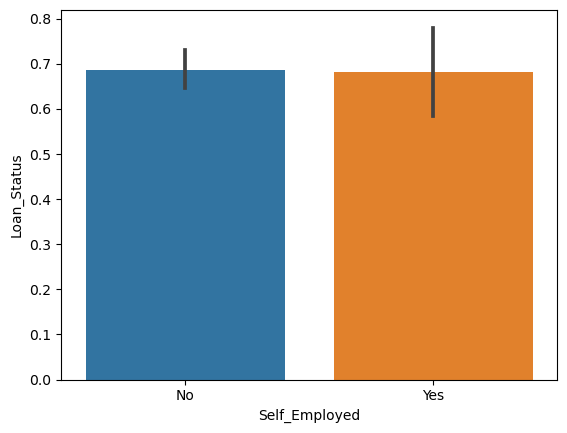

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
#independent column Self_Employed
#Self-employed (Y/N)
sns.countplot(data=df,x='Self_Employed')
plt.show()

# to show that Self_Employed column is effect on Loan_Status or not 
sns.barplot(data=df,x='Self_Employed',y='Loan_Status')
plt.show()
df['Self_Employed'].value_counts()

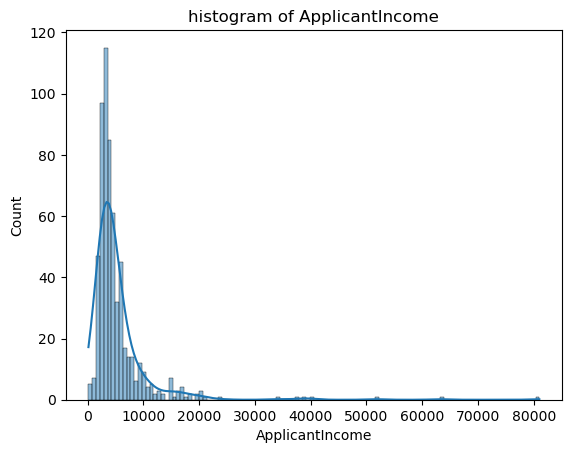

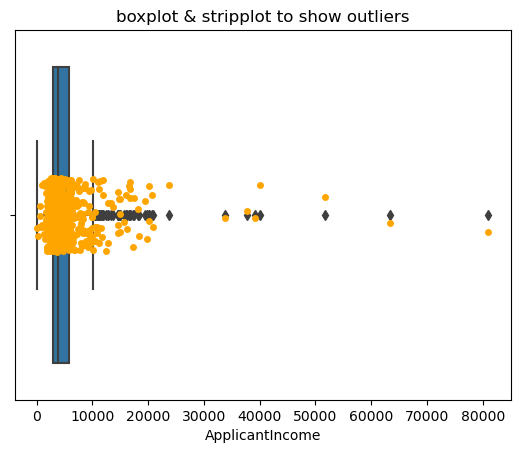

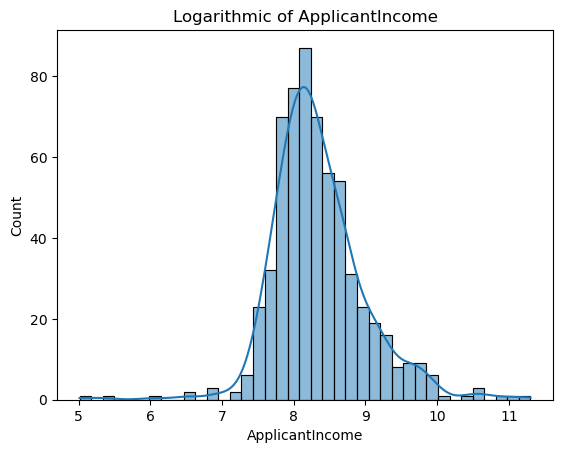

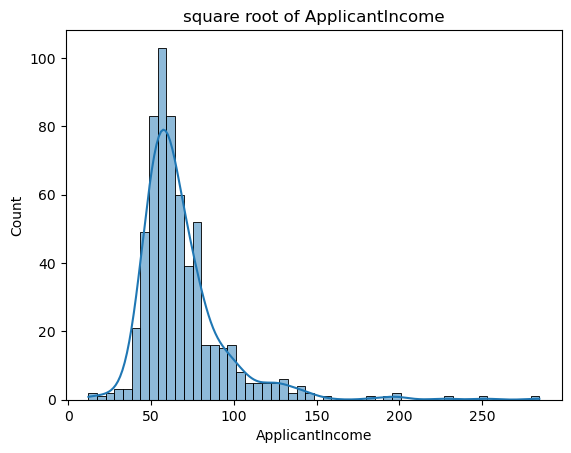

In [14]:
#indepebdent column ApplicantIncome
sns.histplot(data=df,x='ApplicantIncome',kde=True)
plt.title("histogram of ApplicantIncome" )
plt.show()

#note we have outlier in ApplicantIncome
sns.boxplot(x='ApplicantIncome', data=df)
sns.stripplot(x='ApplicantIncome', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(df['ApplicantIncome']),kde=True)
plt.title("Logarithmic of ApplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(df['ApplicantIncome']),kde=True)
plt.title("square root of ApplicantIncome" )
plt.show()

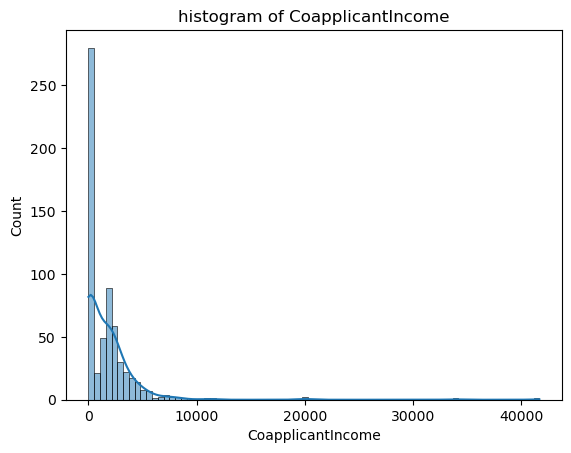

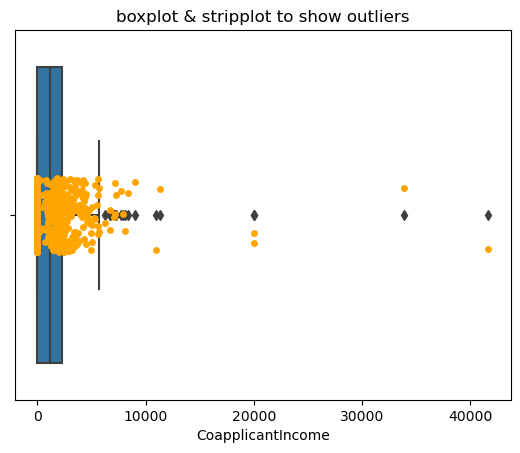

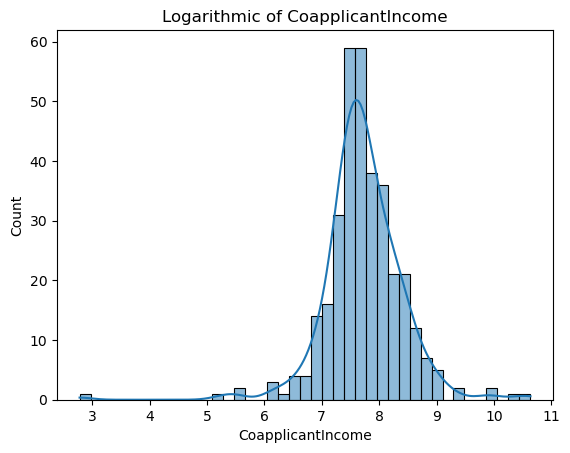

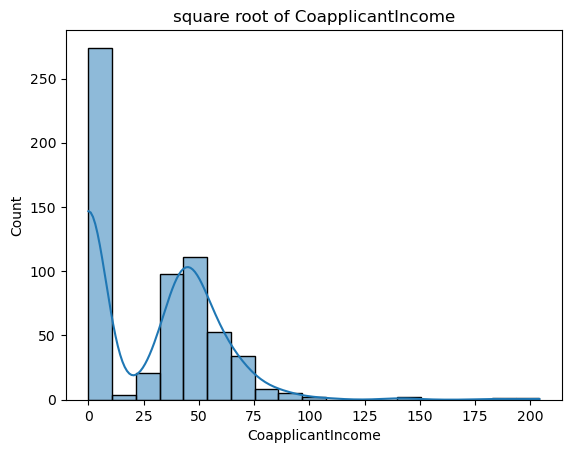

0.0    273
Name: CoapplicantIncome, dtype: int64

In [15]:
#indepebdent column CoapplicantIncome
#Coapplicant income

sns.histplot(data=df,x='CoapplicantIncome',kde=True)
plt.title("histogram of CoapplicantIncome" )
plt.show()

#note have outlier in CoapplicantIncome
sns.boxplot(x='CoapplicantIncome', data=df)
sns.stripplot(x='CoapplicantIncome', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(df['CoapplicantIncome']),kde=True)
plt.title("Logarithmic of CoapplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(df['CoapplicantIncome']),kde=True)
plt.title("square root of CoapplicantIncome" )
plt.show()

df['CoapplicantIncome'].value_counts()[0:0]

**Note**: let's go to visualize the sum of ApplicantIncome and CoapplicantIncome and we will do it because these columns have a relevant information from the raw data and transforming it into a feature that can be used in the machine learning model  and the CoapplicantIncome not following the normal distribution.

We will rename the sum of ApplicantIncome and CoapplicantIncome to TotalIncome at feature engineering step

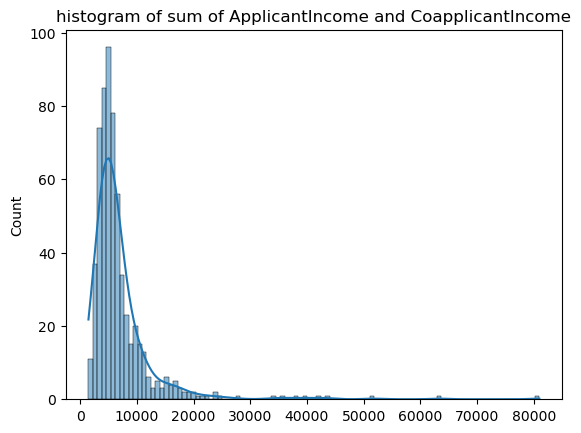

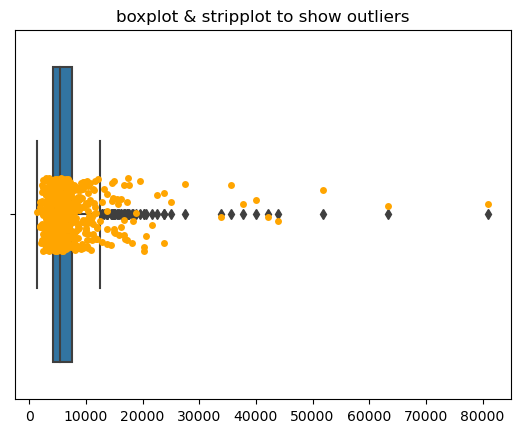

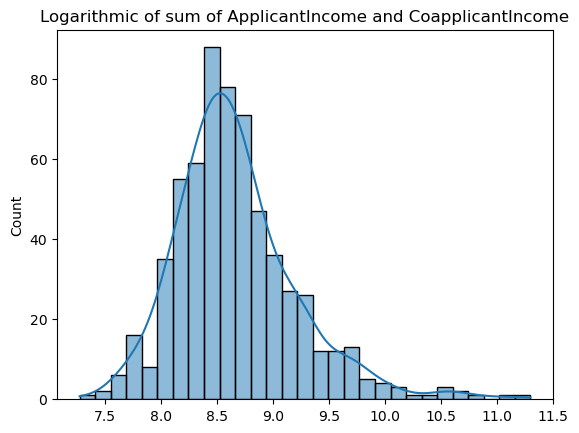

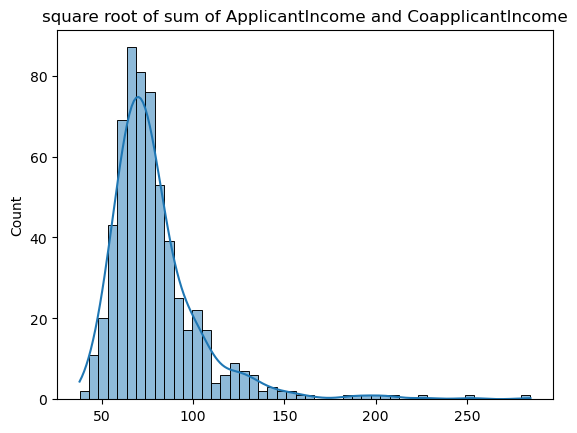

In [16]:
#ApplicantIncome + CoapplicantIncome 

sns.histplot(df['ApplicantIncome']+df['CoapplicantIncome'],kde=True)
plt.title("histogram of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

# Note we have outlier in sum of ApplicantIncome & CoapplicantIncome
sns.boxplot(x=df['ApplicantIncome']+df['CoapplicantIncome'])
sns.stripplot(x=df['ApplicantIncome']+df['CoapplicantIncome'], color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(df['ApplicantIncome']+df['CoapplicantIncome']),kde=True)
plt.title("Logarithmic of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(df['ApplicantIncome']+df['CoapplicantIncome']),kde=True)
plt.title("square root of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

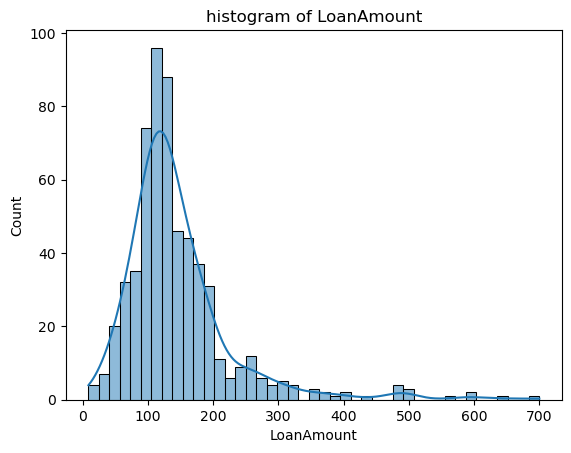

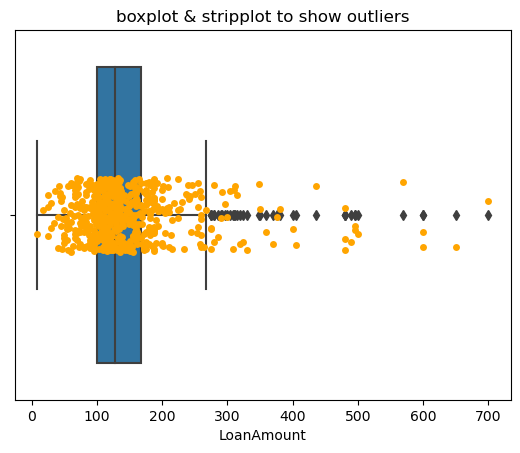

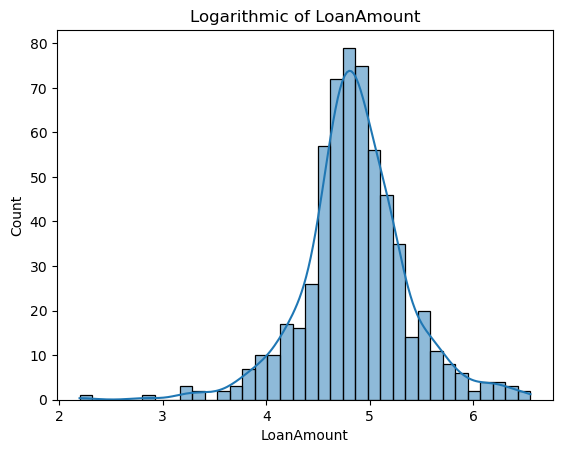

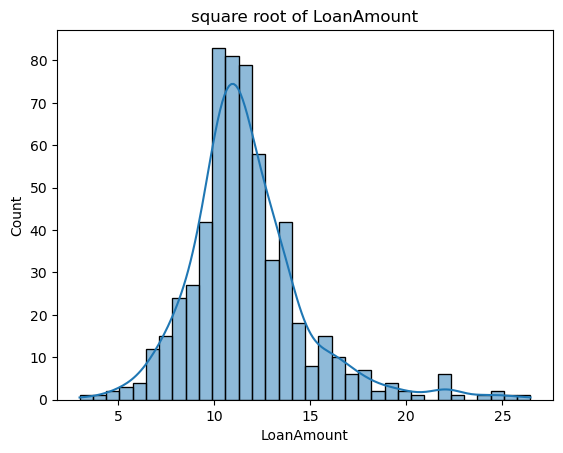

In [17]:
#indepebdent column LoanAmount
#Loan amount in thousands

sns.histplot(data=df,x='LoanAmount',kde=True)
plt.title("histogram of LoanAmount" )
plt.show()

#note we have outlier in CoapplicantIncome
sns.boxplot(x='LoanAmount', data=df)
sns.stripplot(x='LoanAmount', data=df, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(df['LoanAmount']),kde=True)
plt.title("Logarithmic of LoanAmount" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(df['LoanAmount']),kde=True)
plt.title("square root of LoanAmount" )
plt.show()

**Note**: we will discusse about Logarithmic and square_root in data preprocessing at outliers section

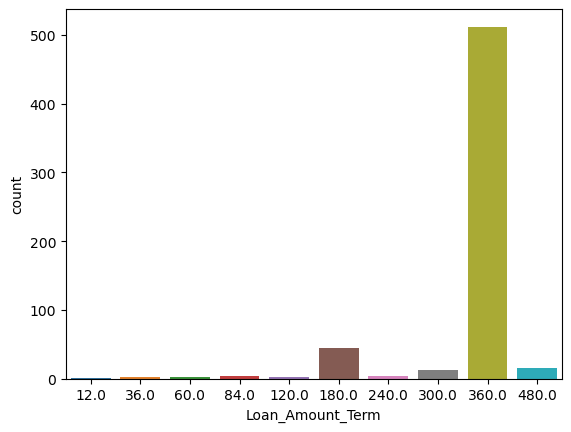

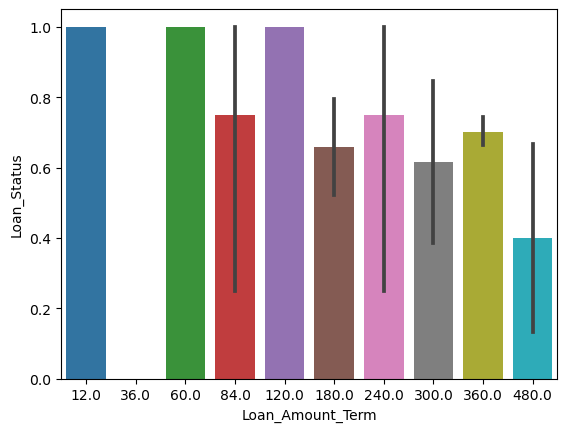

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
#independent column Loan amount term
#Self-employed (Y/N)
sns.countplot(data=df,x='Loan_Amount_Term')
plt.show()

# to show that Self_Employed column is effect on amount term or not 
sns.barplot(data=df,x='Loan_Amount_Term',y='Loan_Status')
plt.show()
df['Loan_Amount_Term'].value_counts()

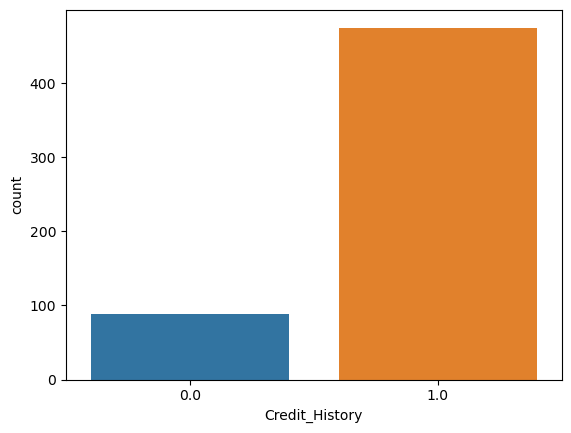

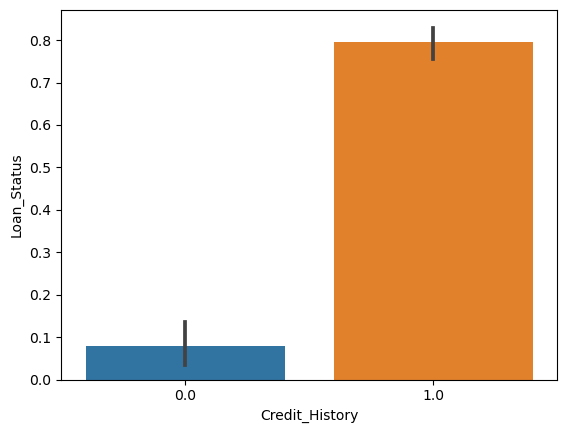

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [19]:
#independent column Credit_History
#credit history meets guidelines
sns.countplot(data=df,x='Credit_History')
plt.show()

# to show that Credit_History column is effect on Loan_Status or not 
sns.barplot(data=df,x='Credit_History',y='Loan_Status')
plt.show()

#count the values of columns
df['Credit_History'].value_counts()

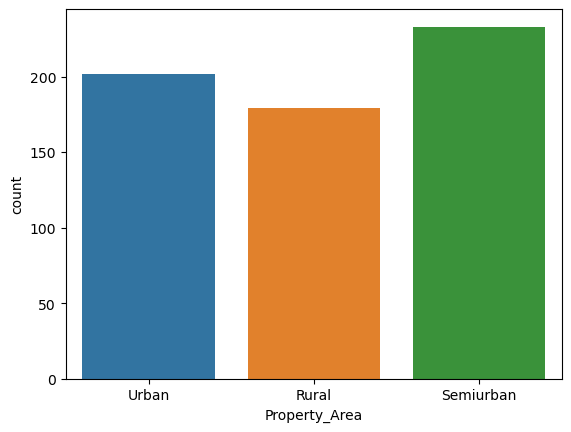

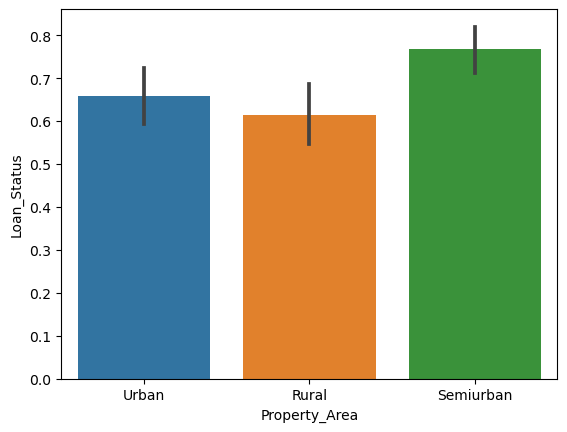

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
#independent column Property_Area
#Urban/ Semi-Urban/ Rural
sns.countplot(data=df,x='Property_Area')
plt.show()

# to show that Property_Area column is effect on Loan_Status or not 
sns.barplot(data=df,x='Property_Area',y='Loan_Status')
plt.show()

#count the values of columns
df['Property_Area'].value_counts()

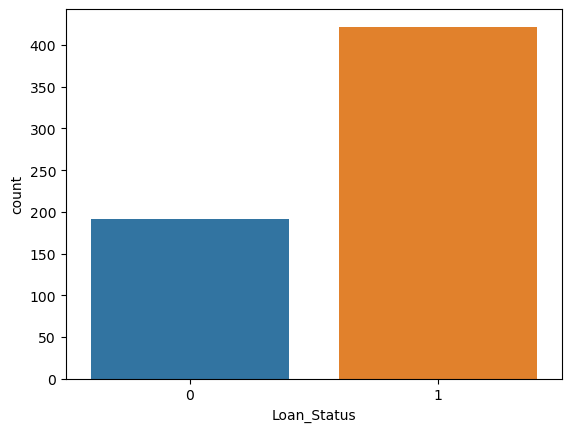

1    422
0    192
Name: Loan_Status, dtype: int64

In [21]:
#depebdent column Loan_Status
#Loan approved (0/1)
sns.countplot(data=df,x='Loan_Status')
plt.show()

#count the values of columns
df['Loan_Status'].value_counts()

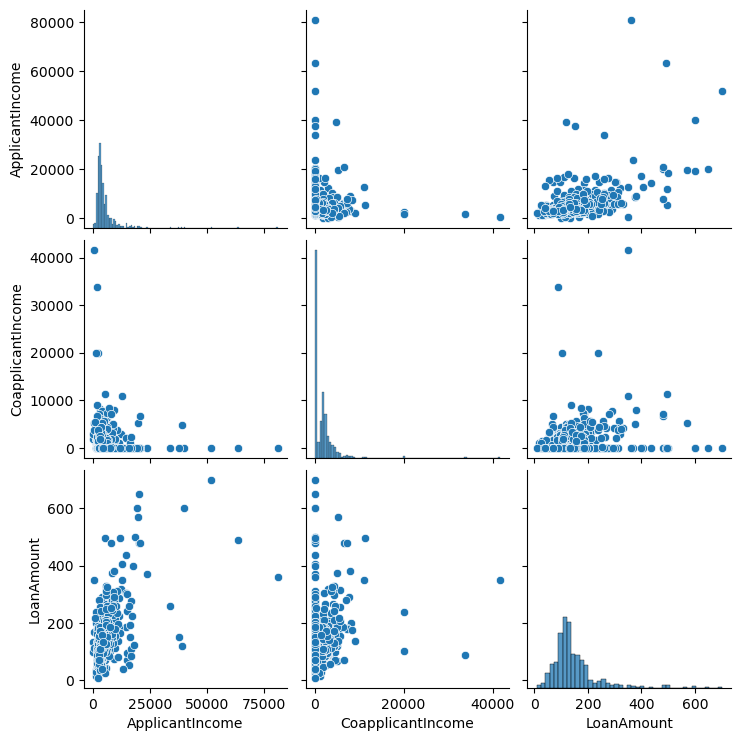

In [22]:
# discover the relationship between all quantitave features 
pair =df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']]
sns.pairplot(data=pair)
plt.show()

# Split data set

**We will split data set into train set and test set**

In [23]:
X = df.drop('Loan_Status',axis=1)
y= df[['Loan_Status']]

**Note:** because the dataset is small we will take 552 rows for trainset and 62 rows for testset

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size= 0.1, random_state= 0)

In [25]:
print('length of Train',len(X_Train))
print('length of Test',len(X_Test))

length of Train 552
length of Test 62


# Data preprocessing
**What is preprocessing on dataset?**

in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

**let's prepare the train set and test set.**
1. firstly train set

In [26]:
df_train=pd.concat([X_Train,y_Train],axis=1)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,1
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,1
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,1
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1


In [27]:
# drop Loan_ID column because it's unique and it's not effiecent in models
df_train.drop(['Loan_ID'],axis=1,inplace=True)

**Label encoding and one-hot encoding are two common techniques used for encoding categorical data into numerical data.**

**Label encoding** is a process of converting categorical variables into numerical variables by assigning a unique integer value to each category. For example, if you have a categorical variable "gender" with categories "Male" and "female" you could assign the values 0 and 1 to these categories, respectively. Label encoding is often used when the categorical variable has a natural ordering

**One-hot encoding**, on the other hand, is a process of converting categorical variables into binary vectors. Each category is represented by a vector of zeros and a single one, indicating the presence of that category, One-hot encoding is often used when the categorical variable has no natural ordering

Both label encoding and one-hot encoding are useful techniques for preparing categorical data for machine learning algorithms, as many algorithms require numerical inputs. However, it is important to choose the appropriate encoding method based on the specific characteristics of the data and the requirements of the algorithm being used.

**why we will wright a function ?**

A function is a block of code that performs a specific task and can be reusable more than one time.

In [28]:
#create function 
def encoding(df):
    # convert to 1 , 0 (male = 1 , female = 0 )
    df['Gender'].replace(to_replace=['Male', 'Female'],
           value=[1,0],inplace = True)
    
    # convert to 1 , 0 (Yes = 1 , No = 0 )
    df['Married'].replace(to_replace=['Yes', 'No'],
           value=[1,0],inplace = True)
    
    # convert to 1 , 0 (Graduate = 1 , Not Graduate = 0 )
    df['Education'].replace(to_replace=['Graduate', 'Not Graduate'],
           value=[1,0],inplace = True)
    
    # convert to 1 , 0 (Yes = 1 , No = 0 )
    df['Self_Employed'].replace(to_replace=['Yes', 'No'],
           value=[1,0],inplace = True)
    
    # convert Dependents coulmn from object to int 
    df['Dependents'].replace(to_replace=['0', '1','2','3+'],
           value=[0,1,2,3],inplace = True)
    
    # one hot encoding for propert area 
    df=pd.get_dummies(df , columns = ['Property_Area'],prefix = ['Property_Area'] )
    
    return df

In [29]:
#apply function
df_train = encoding(df_train)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
406,1.0,1.0,0.0,0,0.0,2167,2400.0,115.0,360.0,1.0,1,0,0,1
17,0.0,0.0,0.0,1,0.0,3510,0.0,76.0,360.0,0.0,0,0,0,1
427,1.0,1.0,2.0,1,0.0,5935,0.0,133.0,360.0,1.0,1,0,1,0
21,1.0,1.0,1.0,1,0.0,5955,5625.0,315.0,360.0,1.0,1,0,0,1
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,1,0,1,0


**feature engneering**

Feature engineering is the process of transforming raw data into features that can be used to improve the performance of machine learning algorithms. The goal of feature engineering is to create features that are relevant, informative, and non-redundant, and that capture the underlying patterns and relationships in the data.

In [30]:
# TotalIncome column will represent the two columns ApplicantIncome and CoapplicantIncome
df_train['TotalIncome']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

**Outliers**

An outlier is a data point that is significantly different from the other data points in a dataset. Outliers can be caused by various factors, such as measurement errors, data entry errors, or unusual phenomena. Outliers can have a significant impact on statistical analysis and machine learning models, as they can skew results and lead to inaccurate predictions.

**how to handel outliers?**
1. **Removal**: but i not prefare that because the data set is very small.
2. **clipping** : clipping is a technique that replaces extreme data points with less extreme values.
3. **Transformation**: Transforming the data can help to reduce the influence of outliers. For example, taking the logarithm or square root of the data may help to reduce the impact of extreme values. its type of features engneering technique

**Note** we will apply Transforming technique.

depened on visualization at EDA we will use logarithm transformation on TotalIncome column.

depened on visualization at EDA we will use square root transformation on LoanAmount column.

In [31]:
#logarithm transformation on TotalIncome column
df_train['Log_TotalIncome']=np.log(df_train['TotalIncome'])

#square root transformation on LoanAmount column
df_train['sqrt_LoanAmount']=np.sqrt(df_train['LoanAmount'])


In [32]:
# drop these columns because i did a feature engineering of those
df_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1,inplace=True)

In [33]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Log_TotalIncome,sqrt_LoanAmount
406,1.0,1.0,0.0,0,0.0,360.0,1.0,1,0,0,1,8.426612,10.723805
17,0.0,0.0,0.0,1,0.0,360.0,0.0,0,0,0,1,8.163371,8.717798
427,1.0,1.0,2.0,1,0.0,360.0,1.0,1,0,1,0,8.688622,11.532563
21,1.0,1.0,1.0,1,0.0,360.0,1.0,1,0,0,1,9.357035,17.748239
460,NaN,1.0,0.0,1,1.0,360.0,NaN,1,0,1,0,8.726806,12.649111


**Note**: we will use techniques to replace NaN values After we will finish the preparation of test set

**Now we finished the preparation of train set let's prepare the test set depend on the results of preparation of test set to prevent of the data leaking**


**preprocessing on Testset**

In [34]:
df_test=pd.concat([X_Test,y_Test],axis=1)

In [35]:
# drop Loan_ID column because it's unique and it's not effiecent in models
df_test.drop(['Loan_ID'],axis=1,inplace=True)

In [36]:
#apply function to Label encoding and one-hot encoding
df_test = encoding(df_test)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
454,1,0,0,1,1.0,7085,0.0,84.0,360.0,1.0,1,0,1,0
52,0,0,0,1,0.0,4230,0.0,112.0,360.0,1.0,0,0,1,0
536,1,1,0,1,0.0,6133,3906.0,324.0,360.0,1.0,1,0,0,1
469,1,1,0,1,0.0,4333,2451.0,110.0,360.0,1.0,0,0,0,1
55,1,1,2,1,0.0,2708,1167.0,97.0,360.0,1.0,1,0,1,0


**feature engineering**

In [37]:
# TotalIncome column will represent the two columns ApplicantIncome and CoapplicantIncome.
df_test['TotalIncome']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

#logarithm transformation on TotalIncome column to handle outliers.
df_test['Log_TotalIncome']=np.log(df_test['TotalIncome'])

#square root transformation on LoanAmount column to handle outliers.
df_test['sqrt_LoanAmount']=np.sqrt(df_test['LoanAmount'])

In [38]:
# drop these columns because i did a feature engineering of those
df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1,inplace=True)

In [39]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Log_TotalIncome,sqrt_LoanAmount
454,1,0,0,1,1.0,360.0,1.0,1,0,1,0,8.865735,9.165151
52,0,0,0,1,0.0,360.0,1.0,0,0,1,0,8.349957,10.583005
536,1,1,0,1,0.0,360.0,1.0,1,0,0,1,9.214233,18.000000
469,1,1,0,1,0.0,360.0,1.0,0,0,0,1,8.822322,10.488088
55,1,1,2,1,0.0,360.0,1.0,1,0,1,0,8.262301,9.848858


**NaN Values**

NaN (Not a Number) is a special floating-point value that represents undefined or unrepresentable values.
how we will replace NaN values in this data set?
1. we will use the MICE imputer with with a DecisionTreeClassifier to predict NaN values in categorical data
2. we will use KNNImputer to predict NaN values in continous data

In [40]:
df_train.isna().sum()

Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              30
Loan_Amount_Term           13
Credit_History             46
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Log_TotalIncome             0
sqrt_LoanAmount            20
dtype: int64

In [41]:
categ_trainset=df_train.drop(['Loan_Status','sqrt_LoanAmount','Log_TotalIncome','Property_Area_Urban'],axis=True)
categ_testset=df_test.drop(['Loan_Status','sqrt_LoanAmount','Log_TotalIncome','Property_Area_Urban'],axis=True)

**Note** When using the MICE imputer with a DecisionTreeClassifier to impute missing values in categorical data, standardization is not necessary

In [42]:
#predict NaN values in categorical data

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

imputer = IterativeImputer(estimator=DecisionTreeClassifier(random_state=0), random_state=0)

# fit and transform the imputer on the data
categ_trainset=pd.DataFrame(imputer.fit_transform(categ_trainset),columns=categ_trainset.columns)
categ_testset=pd.DataFrame(imputer.transform(categ_testset),columns=categ_testset.columns)

prepare dataset for  KNN imputer

In [43]:
conti_trainset=df_train[['sqrt_LoanAmount','Log_TotalIncome']]
conti_testset=df_test[['sqrt_LoanAmount','Log_TotalIncome']]

In [44]:
conti_trainset.reset_index(inplace=True)
conti_testset.reset_index(inplace=True)

In [45]:
conti_trainset=conti_trainset[['sqrt_LoanAmount','Log_TotalIncome']]
conti_testset=conti_testset[['sqrt_LoanAmount','Log_TotalIncome']]

In [46]:
categ_trainset

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban
0,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,360.0,0.0,0.0,0.0
2,1.0,1.0,2.0,1.0,0.0,360.0,1.0,0.0,1.0
3,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
547,1.0,1.0,0.0,1.0,0.0,360.0,1.0,0.0,0.0
548,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0
549,1.0,1.0,3.0,1.0,0.0,360.0,1.0,0.0,1.0
550,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0


In [47]:
X_train_feature=pd.concat([categ_trainset,conti_trainset],axis=1)
X_test_feature=pd.concat([categ_testset,conti_testset],axis=1)

In [48]:
X_train_feature

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,sqrt_LoanAmount,Log_TotalIncome
0,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0,10.723805,8.426612
1,0.0,0.0,0.0,1.0,0.0,360.0,0.0,0.0,0.0,8.717798,8.163371
2,1.0,1.0,2.0,1.0,0.0,360.0,1.0,0.0,1.0,11.532563,8.688622
3,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,0.0,17.748239,9.357035
4,1.0,1.0,0.0,1.0,1.0,360.0,1.0,0.0,1.0,12.649111,8.726806
...,...,...,...,...,...,...,...,...,...,...,...
547,1.0,1.0,0.0,1.0,0.0,360.0,1.0,0.0,0.0,8.944272,8.390041
548,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,1.0,18.681542,10.077819
549,1.0,1.0,3.0,1.0,0.0,360.0,1.0,0.0,1.0,14.142136,9.028099
550,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0,12.649111,8.705000


**Note** it is recommended to apply standardization because Standardization involves subtracting the mean of each feature and dividing by its standard deviation, so that the resulting values have a mean of 0 and a standard deviation of 1. This can help to ensure that all features are on a comparable scale, which can improve the accuracy of the imputation.


In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train_feature)
x_test = ss.transform(X_test_feature)

In [50]:
#predict NaN values in continous data
from sklearn.impute import KNNImputer
imputer = KNNImputer()
X_Train = imputer.fit_transform(X_train)
x_test = imputer.transform(x_test)

In [51]:
y_train=df_train[['Loan_Status']].values
y_test=df_test[['Loan_Status']].values

# classification and evaluation Models

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score
from sklearn.ensemble import RandomForestClassifier

**Random Forest:**

It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

* Some of hyperparameters we will tuning to reduce overfitting
1. **n_estimators:** This hyperparameter controls the number of decision trees in the Random Forest. Increasing the number of trees can improve the model's performance, but can also increase the training time
2. **max_depth:** This hyperparameter controls the maximum depth of each decision tree. Increasing this parameter can improve the model's performance, but can also increase the risk of overfitting.

Train score:  100.0
Test score:  82.3
precision score:  86.0
F1 score:  88.7
-Confusion Matrix-



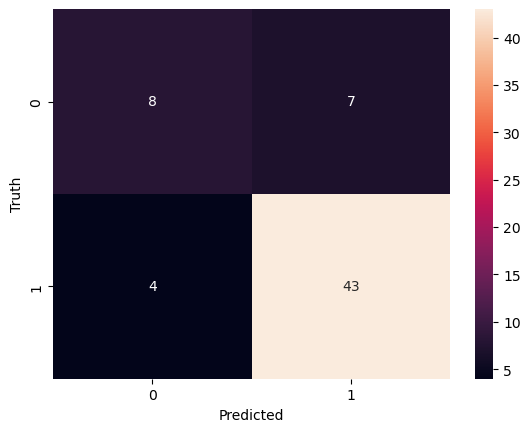

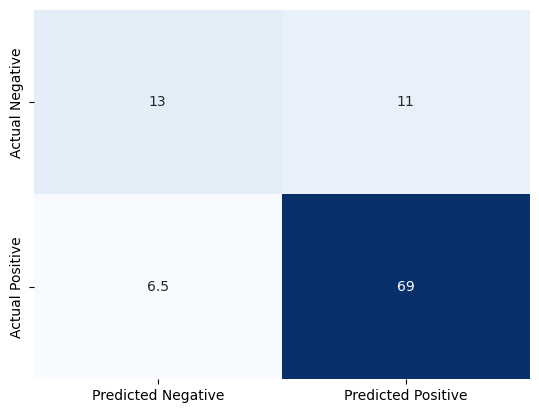

In [53]:
#RandomForest
rf_classifier1 = RandomForestClassifier(random_state = 0)
rf_classifier1.fit(X_Train, y_train)
print('Train score: ',round(rf_classifier1.score(X_Train, y_train),3)*100)

y_pred = rf_classifier1.predict(x_test)
print('Test score: ',round(accuracy_score(y_test,y_pred),3)*100)
print('precision score: ',round(precision_score(y_test, y_pred),3)*100)
print('F1 score: ',round(f1_score(y_test, y_pred),3)*100)

print('-Confusion Matrix-\n')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate percentiles
cm_percent = cm / np.sum(cm) * 100
# Create heatmap using seaborn
sns.heatmap(cm_percent, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.show()

**Note:** a test score of 82.3 in Random Forest is a good result, but the large difference between the train score and test score suggests that the model is overfitting to the training data. It's important to consider other metrics beyond just the train and test scores to fully evaluate the model's performance, and to experiment with same model and different hyperparameters to find the best one for your specific problem.

**so we will tuning at the hyperparameter**

Train score:  86.1
Test score:  87.1
precision score:  86.8
F1 score:  92.0
-Confusion Matrix-



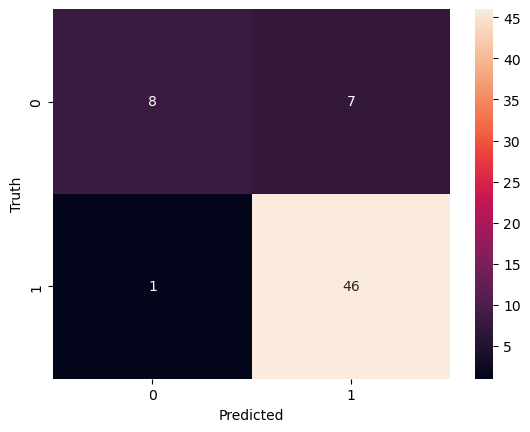

<Axes: >

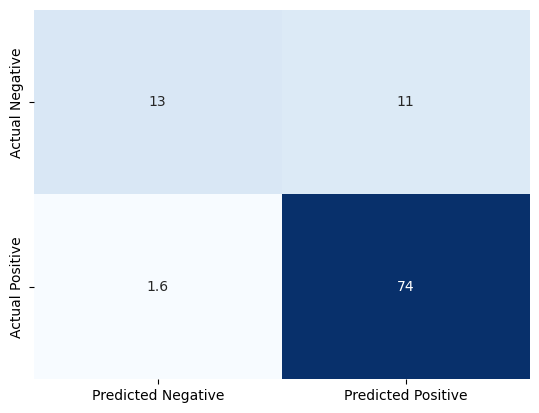

In [54]:
#RandomForest
rf_classifier2 = RandomForestClassifier( n_estimators=130,max_depth=7,random_state = 0)
rf_classifier2.fit(X_Train, y_train)
print('Train score: ',round(rf_classifier2.score(X_Train, y_train),3)*100)

y_pred = rf_classifier2.predict(x_test)
print('Test score: ',round(accuracy_score(y_test,y_pred),3)*100)
print('precision score: ',round(precision_score(y_test, y_pred),3)*100)
print('F1 score: ',round(f1_score(y_test, y_pred),3)*100)

print('-Confusion Matrix-\n')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate percentiles
cm_percent = cm / np.sum(cm) * 100
# Create heatmap using seaborn
sns.heatmap(cm_percent, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

**the second model may be the better option, as it has a smaller difference between the train and test scores and a higher test score.**

# most important features

That techniques that assign a score to input features based on how useful they are at predicting a target variable

In [55]:
Feature=pd.Series(rf_classifier2.feature_importances_,index=X_train_feature.columns).sort_values(ascending=False)
Feature

Credit_History             0.430627
Log_TotalIncome            0.194922
sqrt_LoanAmount            0.148928
Loan_Amount_Term           0.053649
Dependents                 0.041289
Married                    0.027033
Property_Area_Semiurban    0.026533
Property_Area_Rural        0.023709
Education                  0.020543
Gender                     0.016719
Self_Employed              0.016050
dtype: float64

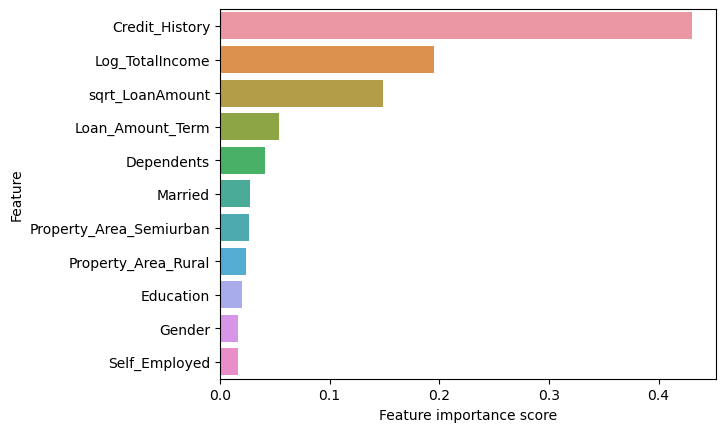

In [56]:
sns.barplot(x=Feature,y=Feature.index)
plt.xlabel('Feature importance score')
plt.ylabel('Feature')
plt.show()

# Model explanation
**Note**: we select a random estimator from 130 estimators from random forest to explain how works?

In [57]:
import graphviz
from sklearn import tree
tree_index = 0  # Select the first tree, you can change this index to visualize other trees
decision_tree = rf_classifier2.estimators_[tree_index]

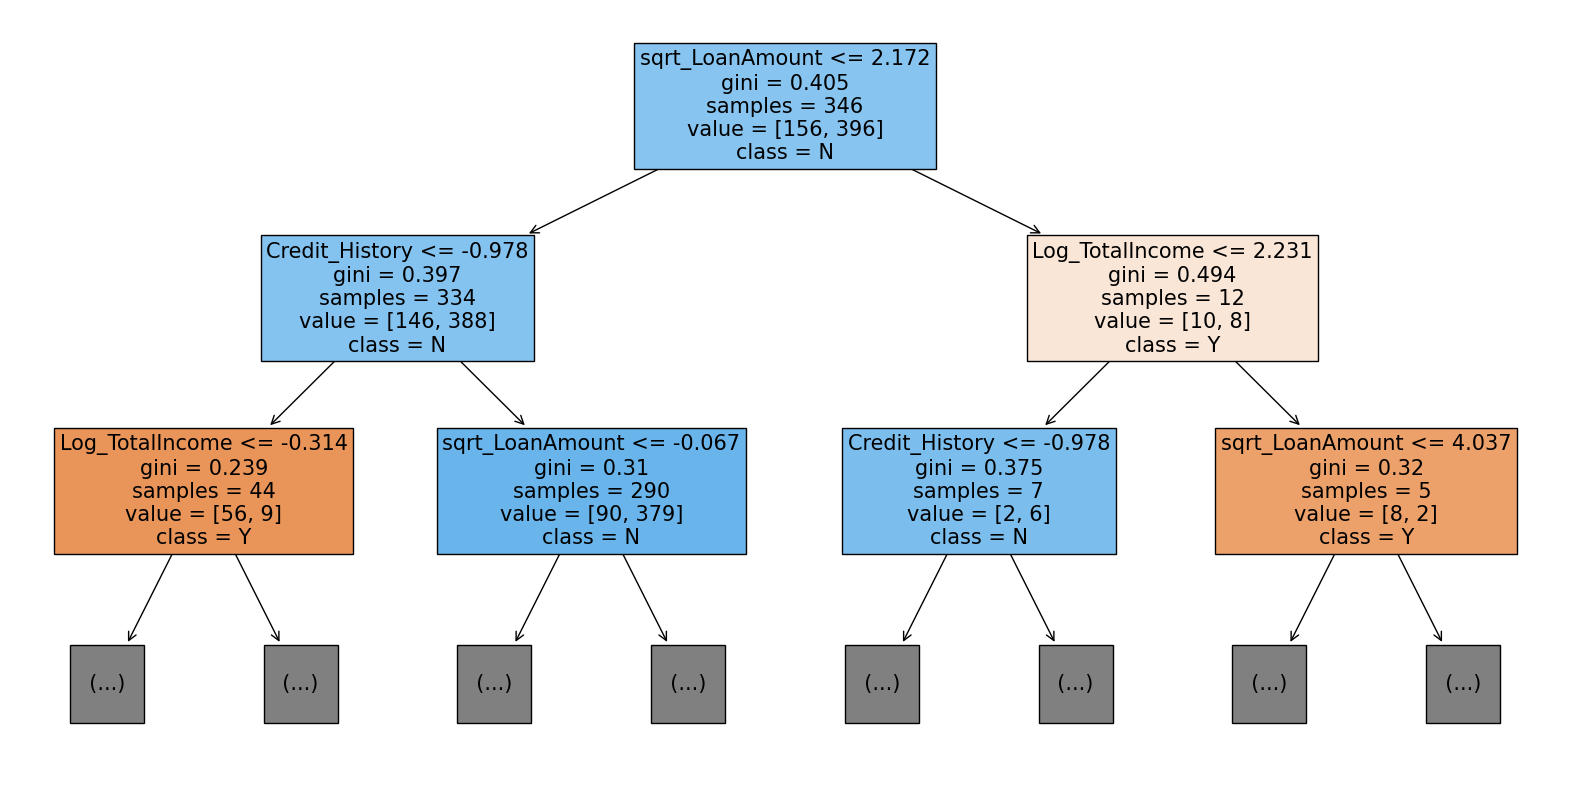

In [58]:
fig = plt.figure(figsize=(20, 10))
m = tree.plot_tree(decision_tree, filled=True, feature_names=X_train_feature.columns,
                   class_names=['Y', 'N'],max_depth=2,fontsize=15)
plt.show()
#note we minimize the depth to show how it work